In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score


## Question 1

Select your favorite two categories below, load the train and test data with the provided code, and print the length of X_train and X_test.

In [3]:
categories = ['sci.electronics', 'misc.forsale']
X_train, y_train = fetch_20newsgroups(random_state=1,
                                      subset='train',
                                      categories=categories,
                                      remove=('footers', 'quotes'),
                                      return_X_y=True)
X_test, y_test = fetch_20newsgroups(random_state=1,
                                    subset='test',
                                    categories=categories,
                                    remove=('footers', 'quotes'),
                                    return_X_y=True)

# for fun, a few more options!!!
'''
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
misc.forsale
'''

'\nrec.motorcycles\nrec.sport.baseball\nrec.sport.hockey\nsci.crypt\nsci.electronics\nsci.med\nsci.space\nmisc.forsale\n'

In [4]:
X_train[1]

'From: sehari@iastate.edu (Babak Sehari)\nSubject: How to the disks copy protected.\nOriginator: sehari@marge.ecss.iastate.edu\nOrganization: Iowa State University of Science and Technology, Ames, Iowa.\nLines: 10\n\n---\n\nI was wondering, what copy protection techniques are avaliable, and how\neffective are they?  Has anyone have any experience in this area?\n\n                      With highest regards,\n                           Babak   Sehari.\n\n'

## Question 2

Vectorize the training data using a count vectorizer with whatever settings you like.

In [5]:
vectorizer = CountVectorizer(max_df=0.95, min_df=0.1,
                                   max_features=40,
                                   stop_words='english')
train_enc = vectorizer.fit_transform(X_train)

In [6]:
train_enc_df=pd.DataFrame(train_enc.toarray(), columns = vectorizer.get_feature_names_out())
train_enc_df.head()

,10,15,20,25,article,com,computer,condition,distribution,does,...,shipping,thanks,time,university,usa,use,used,want,work,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,3,...,0,0,0,1,1,0,0,0,0,0


## Question 3

Show the mean cross-validated score on the training data for at least two versions of a logistic regression. Here are a couple of suggestions:

(we have to mess with the solver setting if we want to use the l1 or l2 penalty so I'm providing a starting point if you want it; see the documentation for more details!)

LogisticRegression(penalty = 'l2', max_iter=10000, solver='saga')

LogisticRegression(penalty = None, max_iter=10000)

In [7]:
LR_model_1 = LogisticRegression(penalty = 'l1', max_iter=10000, solver='saga')
LR_model_1.fit(train_enc_df, y_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [8]:
cross_val_score(LR_model_1, train_enc_df, y_train, cv=5) 

array([0.86016949, 0.85957447, 0.81702128, 0.82978723, 0.84680851])

In [22]:
print(cross_val_score(LR_model_1, train_enc_df, y_train, cv=5).mean())
print(cross_val_score(LR_model_1, train_enc_df, y_train, cv=5).max())

0.8426721961774252
0.8601694915254238


In [9]:
LR_model_2 = LogisticRegression(penalty = 'l2', max_iter=10000, solver='saga')
LR_model_2.fit(train_enc_df, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [18]:
cross_val_score(LR_model_2, train_enc_df, y_train, cv=5)

0.8418247385503065

In [23]:
print(cross_val_score(LR_model_2, train_enc_df, y_train, cv=5).mean())
print(cross_val_score(LR_model_2, train_enc_df, y_train, cv=5).max())

0.8418247385503065
0.8559322033898306


## Question 4

Select your favorite version of the logistic regression and fit it to the training data. Transform the test data and compute the accuracy percent on the test data.

In [25]:
##transform the test data with the vectorizer
X_test_trans = vectorizer.transform(X_test)

In [30]:
##aligning feature names to elements in numpy array
X_test_trans_df=pd.DataFrame(X_test_trans.toarray(), columns = vectorizer.get_feature_names_out())
X_test_trans_df.head()

,10,15,20,25,article,com,computer,condition,distribution,does,...,shipping,thanks,time,university,usa,use,used,want,work,world
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
##my favorite of the two regressions is LR1.  Decided on this due to the slightly higher mean and max cv scores.
y_pred=LR_model_1.predict(X_test_trans_df)

In [36]:
##accuracy calculation
sum(y_test == y_pred) / len(y_test)

0.8748403575989783

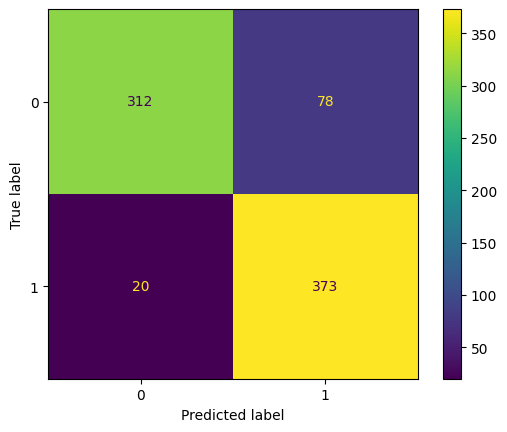

In [38]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=LR_model_1.classes_).plot()

## Question 5 

Which feature in your model has the highest odds ratio? What is its odds ratio?

In [45]:
#answer:
##The feature with the highest odds ratio is 'work' in my selected model.  It has a coefficient of 1.108345 and an odds ratio of 3.029342

coefficients = pd.Series(LR_model_1.coef_[0],  LR_model_1.feature_names_in_)
interpet_model = pd.DataFrame(coefficients, columns = ['coefficient'])
interpet_model['odds ratio'] = np.exp(interpet_model['coefficient'])
interpet_model.sort_values(by=['odds ratio'], ascending=False).head()

,coefficient,odds ratio
work,1.108345,3.029342
world,0.441662,1.555290
know,0.417196,1.517700
don,0.399970,1.491781
does,0.398419,1.489468


## Conceptual question 6: coefficients

A coworker tells you "I fit a linear regression, and the coefficient on number of children is much larger than the coefficient on household income! I can't figure out why that's happening!" What might you say?



Answer: I might start by asking what response/dependent variable they are trying to predict or solve for is.  Ultimately, this should tell my coworker that children are a much better predictor and more statistically significant to their regression than household income is, or at least it is based on their model.  The coefficients help to explain the mathmatical relationship of the independent variables (in this case children and household income) and the dependent variable.  You might want to check the p-values!